# Scikit-learn決策樹演算法

## 載入相關套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import math

## 載入資料集

In [2]:
ds = datasets.load_wine()
feature_names = ds.feature_names
X, y = ds.data, ds.target

## 資料分割

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 模型訓練

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50) 
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

## 模型評分

In [5]:
# 計算準確率
y_pred = clf.predict(X_test)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

97.22%


## 特徵重要性

In [6]:
clf.feature_importances_

array([0.13842351, 0.02949211, 0.0133488 , 0.0321216 , 0.02170211,
       0.05507663, 0.14708828, 0.00708933, 0.04101755, 0.11390275,
       0.08684728, 0.12403105, 0.18985901])

In [7]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## 繪圖

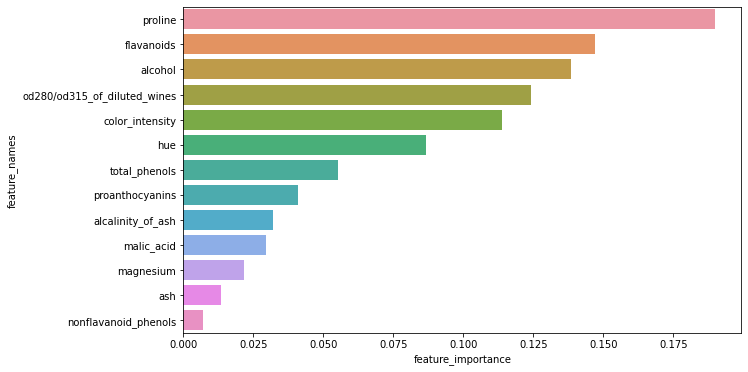

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10,6))
df = pd.DataFrame({'feature_names':feature_names,
                   'feature_importance':clf.feature_importances_})
df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
sns.barplot(x=df['feature_importance'], y=df['feature_names']);

## 使用Permutation importance評估特徵重要性

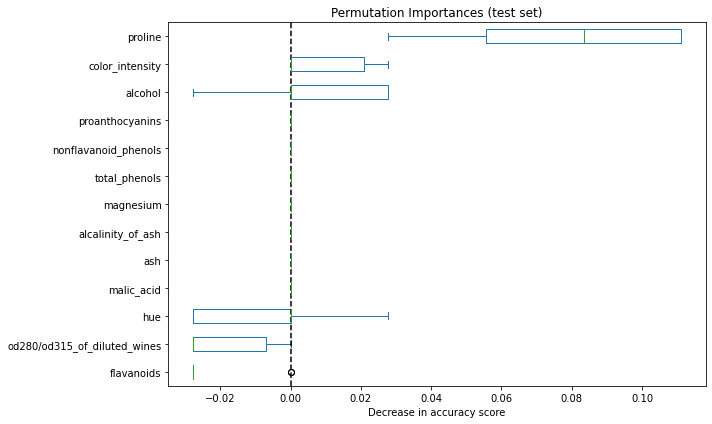

In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=np.array(feature_names)[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10, figsize=(10,6))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()